# Initial data exploration

Before developing a linear regression model to investigate the relationship 
between word count and sentiment (notebook 5) the data was explored to identify 
and remove outliers.

First the data is loaded into a pandas DataFrame.

In [1]:
from brexittweets.custom_funcs.sqlite_functions import create_dataframe_lengths

df = create_dataframe_lengths()
df.set_index('id', inplace=True)
#df.rename(columns={'sentiments_tb': 'sentiment'}, inplace=True)
df.head()

,length,sentiment,tweet_preprocessed
id,,,
1,47,0.00,ben mellor want the tories out he rocks up su...
2,16,0.40,richard ayoade doesnt even sound like he belie...
3,8,0.00,if sht was chocolate no body would starve
4,7,0.00,let me guess you also voted brexit
5,32,0.25,join our webinar with speakers from hogan love...


Look at the spread of values for length and sentiment.

In [4]:
df.describe()

,length,sentiment
count,10436.000000,10436.000000
mean,22.689153,0.044569
std,14.657494,0.260712
min,1.000000,-1.000000
25%,10.000000,0.000000
50%,19.000000,0.000000
75%,35.000000,0.150000
max,59.000000,1.000000


## Dealing with missing values

Check for NaN/empty values

In [3]:
missing_values = df[df['sentiment'].isna()]
len(missing_values)

0

There are no missing values.

## Dealing with outliers

Linear regression is highly sensitive to outliers. 
Visualise the data to identify any outliers and remove from
the data before modelling.

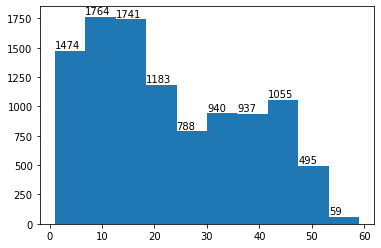

In [5]:
import matplotlib.pyplot as plt

bins = 10
freqs, bin_edges, patches  = plt.hist(df['length'], bins=bins)
for i in range(bins):
    plt.annotate(int(freqs[i]), (bin_edges[i], freqs[i]+20))
plt.show()


The lengths of the tweets do not show a Gaussian pattern, 
therefore scaling will not be applied.
There do not appear to be any outliers.

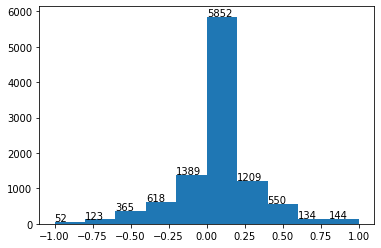

In [6]:
freqs, bin_edges, patches = plt.hist(df['sentiment'], bins=bins)
for i in range(bins):
    plt.annotate(int(freqs[i]), (bin_edges[i], freqs[i]+20))
plt.show()

The majority of tweets are neutral (-0.1 < sentiment < 0.1). Take a stratified sample to ensure that 
training data is representative of dataset.

In [9]:
# Add column labelling tweets as positive, negative or neutral.

from brexittweets.custom_funcs.utils import positive_negative

df['label'] = df['sentiment'].apply(positive_negative)

df.groupby('label')['label'].count()

# Save the pandas DataFrame to use in linear regression task.

df.to_pickle('../data/tweet_lengths_df.pkl')
